In [19]:
import matplotlib.pyplot as plt
import pydicom
import os
import cv2
import numpy as np

np.set_printoptions(threshold=np.inf)

In [20]:
path = "./XRAY TEST/xray"
files = os.listdir(path)

In [21]:
#(0028, 0002) Samples per Pixel                   US: 1 
#每一个像素的取样数，一般来说，CT，MR，DR等灰度图像都是1
#(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2' 
#一般的灰度图像都采用这种，Pixel值越大，图像就越白

ds = []
#pixl_array包含了真实数据

for file in files:
    if not os.path.isdir(file):
        f = path+"/"+file
        data = pydicom.read_file(f)
        ds.append(data.pixel_array)

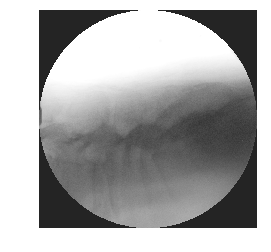

In [22]:
origin = ds[6]

plt.imshow(origin,cmap="gray")
plt.axis("off")
plt.show()

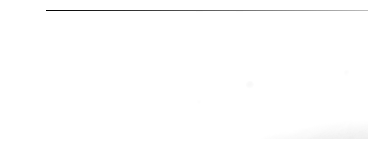

In [23]:
#crop = origin[0:250, 150:800]
#print(crop[100])


crop_1 = np.zeros((250,650), dtype = origin.dtype )
crop_2 = np.zeros((250,650), dtype = origin.dtype )

for i in range(0, 250):
    for j in range(150, 800):
        k = i
        t = j-150
        if origin[i][j] < 700:
            crop_1[k][t] = 4094 #对黑色边角的处理，直接设置最亮
        else:
            crop_1[k][t] = origin[i][j]

crop_2[:, :] = crop_1[:, :]
plt.imshow(crop_1,cmap="gray")
plt.axis("off")
plt.show()
#arr_a = crop_2.flatten()
#n, bins, patches = plt.hist(arr_a, bins=256, normed=1, facecolor='blue', alpha=0.75)  
#plt.show()

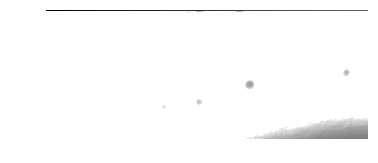

In [24]:
## 采用CLAHE方法

clahe = cv2.createCLAHE(clipLimit=600.0, tileGridSize=(1,1))
img_bb = clahe.apply(crop_1)


plt.axis("off")
plt.imshow(img_bb,cmap="gray")
plt.show()

#arr_b = img_bb.flatten()
#n, bins, patches = plt.hist(arr_b, bins=256, normed=1, facecolor='blue', alpha=0.75)  
#plt.show()

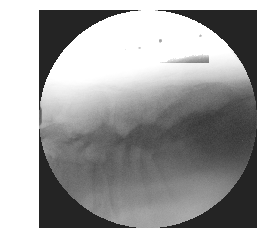

In [25]:
tmp_1 =  np.zeros((origin.shape[0],origin.shape[1]), dtype = origin.dtype )
tmp_1[:, :] = origin[:, :]

cv2.normalize(tmp_1,tmp_1, 0, 255, cv2.NORM_MINMAX)
tmp= cv2.convertScaleAbs(tmp_1)

cv2.normalize(img_bb,img_bb, 0, 255, cv2.NORM_MINMAX)
img_b= cv2.convertScaleAbs(img_bb)

for i in range(0, 250):
    for j in range(0, 650):
        t = j+150
        if origin[i][t] >= 700:
            tmp_1[i][t] = img_bb[i][j]
            
plt.imshow(tmp_1,cmap="gray")
plt.axis("off")
plt.show()
### 在对Xray2的图像7的处理中发现，CLAHE能看到4个点
### 而Gamma和直方图只能看到3个，第四个因为太小就直接被处理掉了